In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import pandas.testing as tm
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv(r'D:\Masters\DMML\Project\Datasets\Europe cleaned.csv',encoding="ISO-8859-1")

In [3]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5,5,diesel,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
2741177,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,man,5.0,5.0,gasoline,1295.34
2741178,skoda,felicia,86415.0,2000.0,1798.0,50.0,other,man,5.0,5.0,electric,1295.34
2741179,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,man,5.0,5.0,gasoline,1295.34
2741180,skoda,fabia,86415.0,2001.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34


In [4]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,2.741182e+06,2.741182e+06,2.741182e+06,2.741182e+06,2.741182e+06
mean,1.061379e+05,2.008254e+03,1.797127e+03,9.307549e+01,9.655620e+03
std,7.082895e+04,5.396100e+00,4.543356e+02,3.418223e+01,9.434192e+03
min,1.000000e+03,1.980000e+03,2.000000e+01,2.000000e+01,9.000000e+02
25%,4.850000e+04,2.005000e+03,1.560000e+03,7.400000e+01,1.600670e+03
50%,9.000000e+04,2.009000e+03,1.798000e+03,8.600000e+01,6.661730e+03
75%,1.559208e+05,2.012000e+03,1.984000e+03,1.050000e+02,1.445678e+04
max,3.000000e+05,2.017000e+03,4.000000e+03,3.000000e+02,5.000000e+04


In [5]:
df.shape

(2741182, 12)

In [6]:
df.loc[df['price_eur']<=2500,'price class']='low'
df.loc[df['price_eur']>=10000,'price class']='high'
df.loc[(df['price_eur']>2500) & (df['price_eur']<10000),'price class']='mid'

In [7]:
df['price class'].value_counts()

high    1021734
mid      878372
low      841076
Name: price class, dtype: int64

In [8]:
df1=df.groupby('price class').sample(50000)

In [9]:
df1['price class'].value_counts()

high    50000
low     50000
mid     50000
Name: price class, dtype: int64

In [10]:
df2 = df1.copy()

In [11]:
X=df2.iloc[:,:-1]
Y=df2['price class']

In [12]:
X.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
319864,audi,a3,22709.0,2015.0,1598.0,81.0,other,auto,4,5,diesel,22061.25
327137,skoda,octavia,86415.0,2009.0,1197.0,81.0,other,man,4,5,gasoline,15126.39
959339,skoda,octavia,10494.0,2014.0,1798.0,86.0,other,man,None,None,gasoline,17000.00
1498028,volkswagen,caddy,9654.0,2011.0,1598.0,75.0,other,man,4.0,5.0,gasoline,13354.96
1297051,volkswagen,scirocco,39999.0,2011.0,1798.0,103.0,other,man,5.0,4.0,gasoline,19000.00


In [13]:
Y.head()

319864     high
327137     high
959339     high
1498028    high
1297051    high
Name: price class, dtype: object

In [14]:
X.drop(['price_eur'],axis=1,inplace=True)

In [15]:
X.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'transmission', 'door_count', 'seat_count',
       'fuel_type'],
      dtype='object')

In [16]:
X_encoded=pd.get_dummies(X)

In [17]:
X_encoded.head()

,mileage,manufacture_year,engine_displacement,engine_power,maker_alfa-romeo,maker_audi,maker_bentley,maker_bmw,maker_chevrolet,maker_chrysler,...,seat_count_8,seat_count_8.0,seat_count_9,seat_count_9.0,seat_count_None,fuel_type_cng,fuel_type_diesel,fuel_type_electric,fuel_type_gasoline,fuel_type_lpg
319864,22709.0,2015.0,1598.0,81.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
327137,86415.0,2009.0,1197.0,81.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
959339,10494.0,2014.0,1798.0,86.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1498028,9654.0,2011.0,1598.0,75.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1297051,39999.0,2011.0,1798.0,103.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
duplicate_features = X_encoded.columns[X_encoded.columns.duplicated()]
X_encoded = X_encoded.drop(columns=duplicate_features)

In [19]:
X_encoded.head()

,mileage,manufacture_year,engine_displacement,engine_power,maker_alfa-romeo,maker_audi,maker_bentley,maker_bmw,maker_chevrolet,maker_chrysler,...,seat_count_6,seat_count_7,seat_count_8,seat_count_9,seat_count_None,fuel_type_cng,fuel_type_diesel,fuel_type_electric,fuel_type_gasoline,fuel_type_lpg
319864,22709.0,2015.0,1598.0,81.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
327137,86415.0,2009.0,1197.0,81.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
959339,10494.0,2014.0,1798.0,86.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1498028,9654.0,2011.0,1598.0,75.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1297051,39999.0,2011.0,1798.0,103.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder=LabelEncoder()

In [22]:
Y_encoded=label_encoder.fit_transform(Y)

In [23]:
Y_encoded

array([0, 0, 0, ..., 2, 2, 2])

# Splitting dataset

In [24]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded , Y_encoded, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (120000, 867)
Shape of testing feature: (30000, 867)
Shape of training label: (120000,)
Shape of training label: (30000,)


Accuracy on training set: 0.995
Accuracy on validation set: 0.839
F1-score: 0.8390372389352485
[[9030  176  847]
 [ 356 8304 1430]
 [ 708 1317 7832]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     10053
           1       0.85      0.82      0.84     10090
           2       0.77      0.79      0.78      9857

    accuracy                           0.84     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.84      0.84      0.84     30000



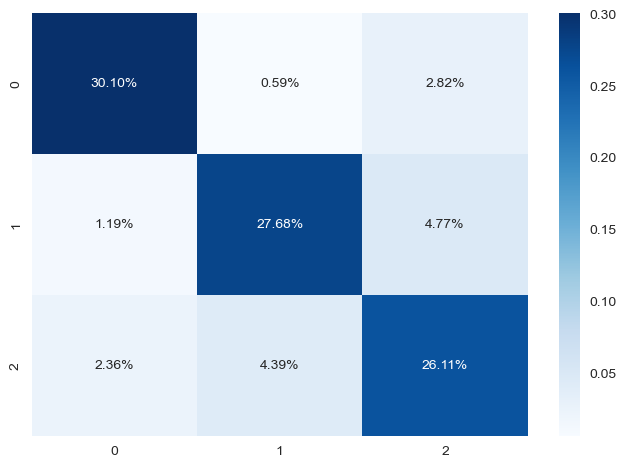

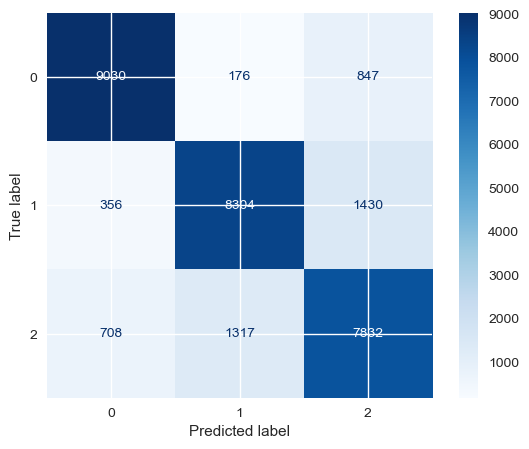

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

print("Accuracy on validation set: {:.3f}".format(rf.score(X_test, y_test)))

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
Confmat_rf = confusion_matrix(y_test,y_pred_rf)
Confmat_rf = sns.heatmap(Confmat_rf/np.sum(Confmat_rf),annot=True, 
            fmt='.2%', cmap='Blues')

from sklearn.metrics import classification_report,confusion_matrix,f1_score
f1_score = f1_score(y_test, y_pred_rf, average='weighted')
print("F1-score:", f1_score)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Blues)
plt.gcf().set_size_inches(7, 5)

In [26]:
df3 = pd.DataFrame({'Prediction': y_pred_rf})
df3.to_csv(r'D:\Masters\DMML\Project\Predictions\EU RF SKL.csv', index = False)

In [27]:
import lightgbm as lgb

# Define the random forest model parameters
rf_params = {
    'boosting_type':'rf', 
    'num_leaves':31, 
    'max_depth':-1,
    'n_estimators':100, 
    'bagging_freq':1, 
    'bagging_fraction':0.8,
    'feature_fraction':0.8, 
    'random_state':42
}

# Initialize the random forest model
rf = lgb.LGBMClassifier(**rf_params)

# Train the random forest model
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score,f1_score
report = classification_report(y_test, rf_pred)
f1_score = f1_score(y_test, rf_pred, average='weighted')
accuracy = accuracy_score(y_test, rf_pred)
print('Classification Report:')
print(report)
print("F1-score:", f1_score)
print('Accuracy:', accuracy)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     10053
           1       0.80      0.77      0.79     10090
           2       0.72      0.73      0.72      9857

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000

F1-score: 0.7914673577975075
Accuracy: 0.7917666666666666


In [28]:
df4 = pd.DataFrame({'Prediction': rf_pred})
df4.to_csv(r'D:\Masters\DMML\Project\Predictions\EU RF LGB.csv', index = False)

Accuracy on training set: 0.748
Accuracy on validation set: 0.639
F1-score: 0.6340731896970261
[[8150  640 1263]
 [1422 5992 2676]
 [2012 2822 5023]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     10053
           1       0.63      0.59      0.61     10090
           2       0.56      0.51      0.53      9857

    accuracy                           0.64     30000
   macro avg       0.63      0.64      0.63     30000
weighted avg       0.63      0.64      0.63     30000



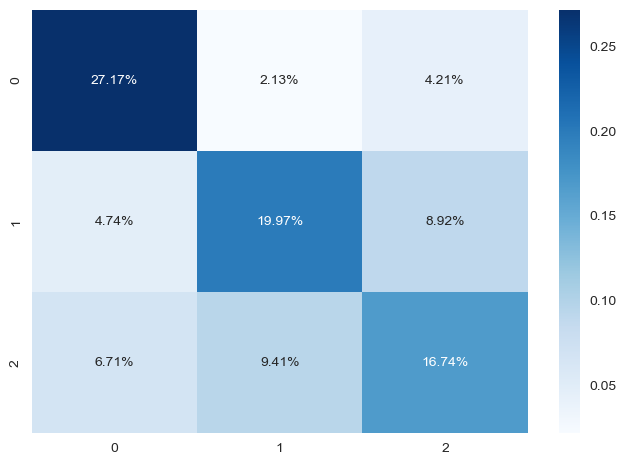

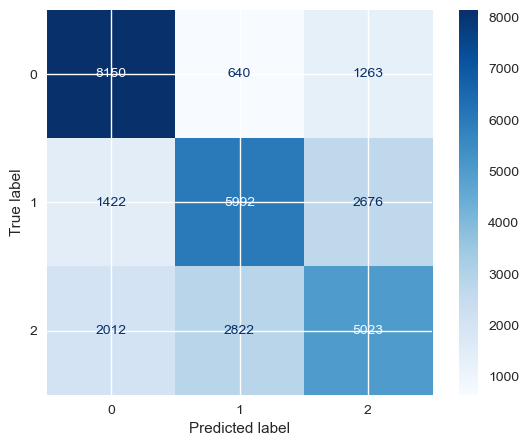

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))

print("Accuracy on validation set: {:.3f}".format(knn.score(X_test, y_test)))

y_pred_KNN = knn.predict(X_test)

Confmat_KNN = confusion_matrix(y_test,y_pred_KNN)
Confmat_KNN = sns.heatmap(Confmat_KNN/np.sum(Confmat_KNN),annot=True, 
            fmt='.2%', cmap='Blues')

from sklearn.metrics import classification_report,confusion_matrix,f1_score
f1_score = f1_score(y_test, y_pred_KNN, average='weighted')
print("F1-score:", f1_score)
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues)
plt.gcf().set_size_inches(7, 5)

In [30]:
df5 = pd.DataFrame({'Prediction': y_pred_KNN})
df5.to_csv(r'D:\Masters\DMML\Project\Predictions\EU KNN SKL.csv', index = False)

In [31]:
import lightgbm as lgb

# Define the KNN model parameters
knn_params = {
    'boosting_type': 'gbdt',
    'n_neighbors': 5,
    'num_leaves': 31,
    'n_estimators': 100,
    'random_state': 42
}

# Initialize the KNN model
knn = lgb.LGBMClassifier(**knn_params)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score,f1_score
report = classification_report(y_test,knn_pred)
accuracy = accuracy_score(y_test, knn_pred)
f1_score = f1_score(y_test, knn_pred, average='weighted')
print('Classification Report:')
print(report)
print("F1-score:", f1_score)
print('Accuracy:', accuracy)

[LightGBM] [Warning] Unknown parameter: n_neighbors
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10053
           1       0.85      0.82      0.84     10090
           2       0.77      0.79      0.78      9857

    accuracy                           0.84     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.84      0.84      0.84     30000

F1-score: 0.8399546399136395
Accuracy: 0.8398


In [32]:
df6 = pd.DataFrame({'Prediction': knn_pred})
df6.to_csv(r'D:\Masters\DMML\Project\Predictions\EU KNN LGB.csv', index = False)